# Nuages de mots

## Imports et stopwords

In [505]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [506]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [507]:
# Choisir une année
year = 1908

In [508]:
# Lister les fichiers de cette année
data_path = '../../data/leopoldII'
txt_path = '../../data/leopoldII/txt'
txt_clean = '../../data/leopoldII/tmp/clean'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB555_1908-07-12_01-00002.txt',
 'KB_JB638_1908-03-21_01-00002.txt',
 'KB_JB555_1908-09-18_01-00002.txt',
 'KB_JB567_1908-09-04_01-00003.txt',
 'KB_JB555_1908-09-20_01-00002.txt',
 'KB_JB729_1908-04-17_01-00001.txt',
 'KB_JB567_1908-08-09_01-00001.txt',
 'KB_JB685_1908-07-18_01-0002.txt',
 'KB_JB729_1908-06-04_01-00003.txt',
 'KB_JB567_1908-08-14_01-00002.txt',
 'KB_JB685_1908-03-25_01-0003.txt',
 'KB_JB555_1908-03-06_01-00003.txt',
 'KB_JB555_1908-07-05_01-00003.txt',
 'KB_JB838_1908-09-03_01-00004.txt',
 'KB_JB838_1908-08-22_01-00002.txt',
 'KB_JB685_1908-09-05_01-0003.txt',
 'KB_JB729_1908-04-24_01-00003.txt',
 'KB_JB685_1908-12-14_01-0001.txt',
 'KB_JB555_1908-12-15_01-00002.txt',
 'KB_JB638_1908-07-25_02-00007.txt',
 'KB_JB421_1908-08-21_01-00001.txt',
 'KB_JB567_1908-12-03_01-00003.txt',
 'KB_JB572_1908-04-09_01-00004.txt',
 'KB_JB685_1908-10-26_01-0002.txt',
 'KB_JB555_1908-01-21_01-00002.txt',
 'KB_JB638_1908-09-12_02-00002.txt',
 'KB_JB685_1908-01-27_01-0002.txt',
 'KB_JB

In [509]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    print(txt)
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

KB_JB555_1908-07-12_01-00002.txt
KB_JB638_1908-03-21_01-00002.txt
KB_JB555_1908-09-18_01-00002.txt
KB_JB567_1908-09-04_01-00003.txt
KB_JB555_1908-09-20_01-00002.txt
KB_JB729_1908-04-17_01-00001.txt
KB_JB567_1908-08-09_01-00001.txt
KB_JB685_1908-07-18_01-0002.txt
KB_JB729_1908-06-04_01-00003.txt
KB_JB567_1908-08-14_01-00002.txt
KB_JB685_1908-03-25_01-0003.txt
KB_JB555_1908-03-06_01-00003.txt
KB_JB555_1908-07-05_01-00003.txt
KB_JB838_1908-09-03_01-00004.txt
KB_JB838_1908-08-22_01-00002.txt
KB_JB685_1908-09-05_01-0003.txt
KB_JB729_1908-04-24_01-00003.txt
KB_JB685_1908-12-14_01-0001.txt
KB_JB555_1908-12-15_01-00002.txt
KB_JB638_1908-07-25_02-00007.txt
KB_JB421_1908-08-21_01-00001.txt
KB_JB567_1908-12-03_01-00003.txt
KB_JB572_1908-04-09_01-00004.txt
KB_JB685_1908-10-26_01-0002.txt
KB_JB555_1908-01-21_01-00002.txt
KB_JB638_1908-09-12_02-00002.txt
KB_JB685_1908-01-27_01-0002.txt
KB_JB555_1908-07-17_01-00003.txt
KB_JB685_1908-05-03_01-0003.txt
KB_JB555_1908-12-19_01-00002.txt
KB_JB555_1908-03-

In [510]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

154

In [511]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"jet. Cela dura jusqu'au moment où les curés s'étant solidarisés avec la réaction, las prooeesiona prirent forcément un caractère de manifestation politique. Plus tard, quand les passions seront calmée"

In [512]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/leopoldII/tmp/txt'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

[nltk_data] Downloading package stopwords to /home/nako/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [513]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"jet. Cela dura jusqu'au moment où les curés s'étant solidarisés avec la réaction, las prooeesiona prirent forcément un caractère de manifestation politique. Plus tard, quand les passions seront calmées, si les prêtres consentent à n'être que les serviteurs d'un dogme, on pourra sans doute leur permettre de sortir leurs soieries, leurs ohâises de bois doré et do se promener dans les rues en chantant des refrains, auxquels, du reste, personne ne comprend rien. Mais ce jour-là, y aura-t-il vraiment"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [514]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/txt/{year}.txt"
        output_path = f"{folder}/clean/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 3 and len(w) < 25 and w.isalpha() and w not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [515]:
temp= '../../data/leopoldII/tmp'
clean_text(year, folder=temp)

'Output has been written in ../../data/leopoldII/tmp/clean/1908_clean.txt!'

In [516]:
# Vérifier le résultat
with open(os.path.join(txt_clean, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'cela dura moment curés solidarisés réaction prooeesiona prirent forcément caractère manifestation politique plus tard quand passions calmées prêtres consentent serviteurs dogme pourra doute permettre sortir leurs soieries leurs ohâises bois doré promener rues chantant refrains auxquels reste personne comprend rien mais jour vraiment public exclusivement religieux promenades singulières douteux plue allons crainte ridicule grandit shambre députés séance vendredi ensemble projet puâtes tjoùtfi but'

In [517]:
words = nltk.wordpunct_tokenize(after)

print(f"Nous avons identifié {len(words)} tokens dans notre corpus.")
print(f"Voici un apperçu des 25 premiers tokens :\n {words[:25]}")

Nous avons identifié 435305 tokens dans notre corpus.
Voici un apperçu des 25 premiers tokens :
 ['cela', 'dura', 'moment', 'curés', 'solidarisés', 'réaction', 'prooeesiona', 'prirent', 'forcément', 'caractère', 'manifestation', 'politique', 'plus', 'tard', 'quand', 'passions', 'calmées', 'prêtres', 'consentent', 'serviteurs', 'dogme', 'pourra', 'doute', 'permettre', 'sortir']


In [518]:
if any("c" in k for k in words):
    print("le mot 'c' est dans la liste")
else:
    print("le mot 'c' n'est pas là dans la liste")

le mot 'c' est dans la liste


## Nuage de mots

### Afficher les termes les plus fréquents


In [519]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('congo', 1674), ('belgique', 1089), ('bruxelles', 1052), ('très', 1044), ('gouvernement', 889), ('ministre', 846), ('belge', 836), ('question', 815), ('chambre', 813), ('francs', 760)]


### Créer, stocker et afficher le nuage de mots

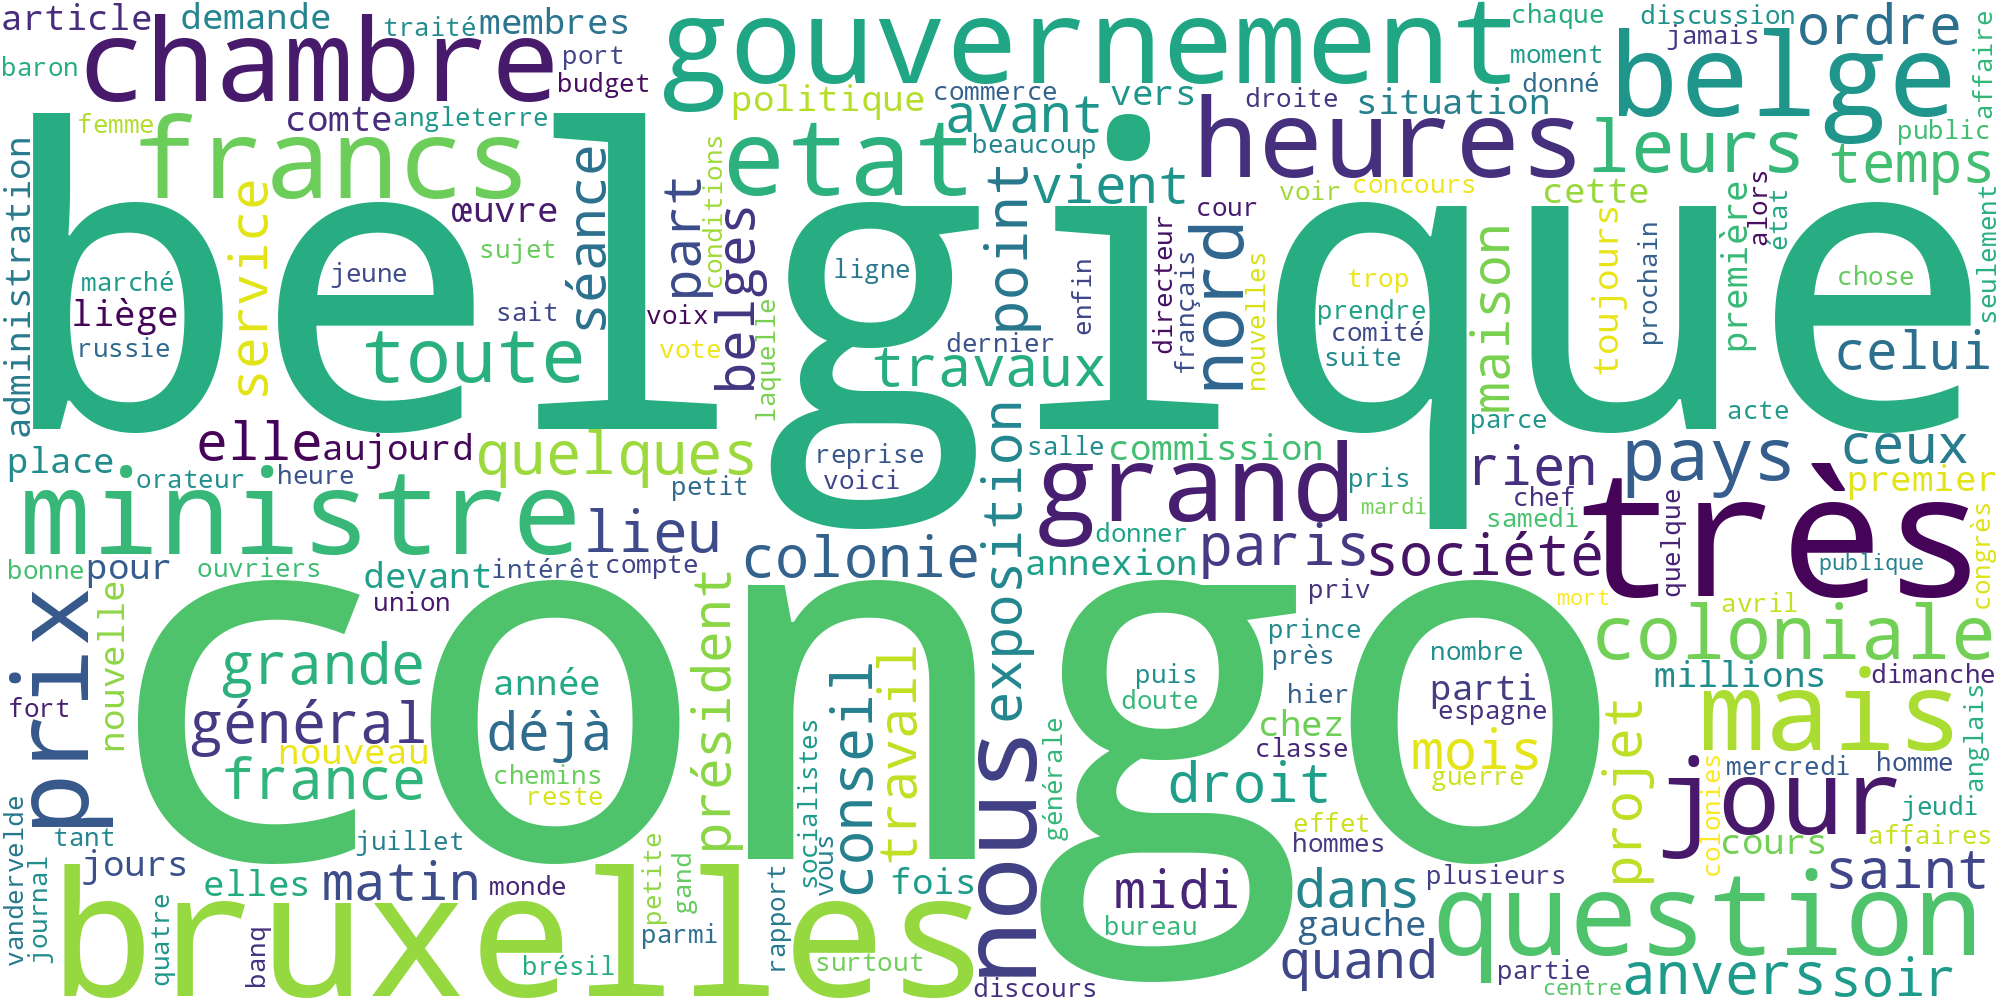

In [520]:
img = '../../data/leopoldII/tmp/png'
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(img, f"{year}.png"))
Image(filename=os.path.join(img, f"{year}.png"))